# Summer Stage 2020 - Cosmology
This notebook is the English translation of the 'Stage Estivi 2020' activity at the University of Ferrara. Main contributors are: Shahbaz Alvi, Luca Caloni, Serena Giardiello, Caterina Chiocchetta, Margherita Lembo, Umberto Natale.

# Let's load useful modules

In [2]:
import numpy as np              # math functions in this module
import matplotlib.pyplot as plt # plotting functions in this module 

Run the cell below only if you are in a Google Drive env

In [3]:
# Authenticate with your gmail account
# Run this cell, click on the link, authenticate with your gmail account,
# copy the link provided after authentication and paste it below
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

We will work with real Supernovae (SN) data. Useful commands for analysing and plotting SN data are given in the cells below.
We will run the first cells. Afterwards, you will be requested to fill cells with missing commands.

Write missing pieces of code in the empty cells. Each empty cell is followed by a hidden cell. If you click on the 'Show Text' button, the hidden cell will be inflated and you will be able to check the solution. Try not to visualize the solution, unless you have no clue on how to fill empty cells.

Have fun!

# Let's load data

In [ ]:
# If you are on colab, run this cell to print the path to the working directory
!pwd
# and to check whether the file gold.dat is in your directory
!ls

In [7]:
# Use the link below only if you are in a Google Drive env
#path_to_data='/content/drive/Shared drives/path/to/data/gold.dat'
path_to_data='gold.dat'
# Replace the text string above with the actual path to your data file 
# (as obtained from the !pwd command above), followed by the name of the file gold.dat
data=np.loadtxt(path_to_data)

data.shape # Supernovae: redshift (z), distance modulus (Md), empty field, error on distance modulus

(157, 4)

data is an object that contains the file content. It is a 157row-by-4column matrix. We can pick up individual elements of this matrix, say element ij that is located at the overlap between row i and column j:

data[i,j]

The 0-0 element is 

data[0,0]

The 130-3 element is

data[130,3].

Note that we start counting from 0. Python is a programming language that identifies the first element of each row/column by 0. The first row is thus the number 0. The last row is the number 156. In a similar way, the first column is the number 0, the last column is the number 3.

In our case, we have 4 data columns for 157 SN. For each row, the 4 columns are: redshift z of that SN, the SN distance modulus M-m (a proxy for the SN distance), an empty column (it was supposed to contain the systematic error on the measurement), and the error on the distance modulus.

To ease the notation, let's define 3 data vectors from the original data matrix:

In [8]:
z = data[:,0] 
# The formalism above indicates that
# we are extracting all rows (the ':')
# and only the first column (the '0')
# and we are putting those elements into a vector named z

Md = data[:,1]     # Same here, we only take the second column
err_Md = data[:,3] # Same here, we only take the fourth column

# Let's make a plot

Text(0, 0.5, 'M-m')

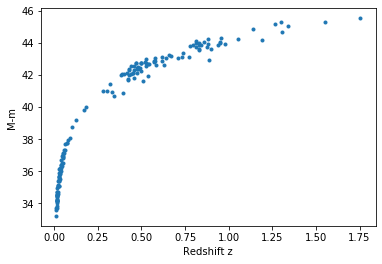

In [9]:
# We make use of the 'plot' function from the matplotlib.pyplot (plt) module
# to visualize the data previously read from file
# We have the redshift on the x-axis
# We have the distance modulus on the y-axis

plt.plot(z, Md,'.')       # We ask the plot function to report the vector z along the x-axis, 
                          # the vector Md along the y-axis, and to show the points as dots ('.')
plt.xlabel('Redshift z')  # We ask to write 'Redshift z' as the x-axis label
plt.ylabel('M-m')         # Same here, we want 'M-m' as y-axis label

Text(0, 0.5, 'M-m')

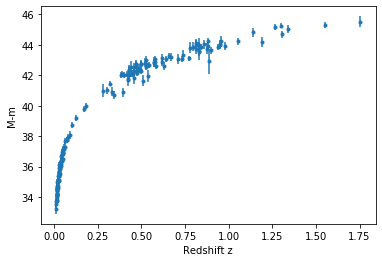

In [10]:
# Now, let's add the errobars!
plt.errorbar(z, Md, err_Md, marker='.', linestyle='') 

# The 'errorbar' function is slighlty different from 'plot'
# errorbar allows to attach an errorbar to each point
# The linestyle option allows to specify if and how we want the points to be connected
# In our case, we do not want any connection ('')
# You can try and write linestyle='-' instead, and see what happens!

plt.xlabel('Redshift z')
plt.ylabel('M-m')

# Let's compute the SN distances and relative error

When scientists observe SN, what they really measure is the SN apparent magnitude (magnitude is a name that indicates luminosity). At some point at the beginning of the 20th century, scientists realized that there are specific classes of celestial objects that now we call 'standard candles'. For these objects, it is possible to work out the intrinsic luminosity from other observable properties. For example, Henrietta Leavitt was the first to discover that there is a relation between the pulsating period of some peculiar stars (Cepheids) and their intrinsic luminosity. This is extremely helpful, because, if the intrinsic luminosity 'M' is known and the apparent magnitude 'm' is observed, one can determine the distance of an object by comparing M and m. 

In our data file, we have a combination of M and m, the distance modulus. From the distance modulus, we can compute the distance 'd' of each SN using the definition of distance modulus:

M-m = 5 log10(d) - 5

The distance 'd' is therefore

d = 10^[(M-m+5)/5]

and, if computed from the formula above, is expressed in parsec (pc). Parsec is a unit of measurement for very long distances...It corresponds to the distance from which the distance between Earth and the Sun subtends an arc-second angle (1/3600 deg). In other words, the parsec is a cathetus of a triangle that has Earth-Sun distance as the other cathetus. From this definition, one can easily see that 

1 parsec ~ a thousand billions km

For convenience, we further divide the SN distance by one million (10^6), so that the distance is expressed in Mega parsec. Supernovae are really far objects! 

We also need to propagate the error on the distance modulus to the distance. We can use the standard formula for error propagation:

err(d) = err(M-m) derivative(d) with respect to (M-m) 
       = err(M-m) log(10) d/5

In [11]:
d = 10**(Md/5.+1)/10**6          # The pythonic way to express exponentials (x^y) is 'x**y'
err_d = np.log(10)*d/5.*err_Md

# First task

Plot the distance 'd'
as a function of redshift z
with errorbars

In [0]:
# Write here your piece of code
# ...

The cell below is supposed to be hidden in google colab. It contains the solution to the exercise described above.

Text(0.5, 1.0, 'Gold catalogue')

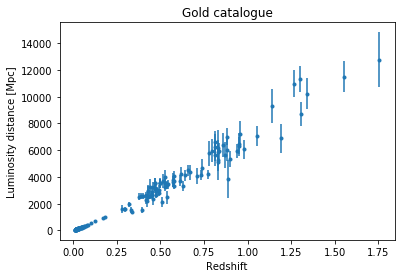

In [12]:
#@title  { display-mode: "code" }
# Plot the distance 'd' 
# as a function of redshift z
# with errorbars

plt.errorbar(data[:,0],d,err_d,marker='.',linestyle='')
plt.xlabel('Redshift')
plt.ylabel('Luminosity distance [Mpc]')
plt.title('Gold catalogue')

As we see in the figure, the SN catalogue contains also very far objects (z~1.75). However, we know that the Hubble law is only valid for closest objects (z<<1). We remind that the Hubble law states that there is a direct proportionality between distance and redshift of an object.

So, let's cut our catalogue so to retain only those objects with z<<1. Concretely, let's define a threshold above which any object is considered as being too far. Let's this threshold be zcut=0.1.

In [16]:
# zcut is threshold above which we don't want to retain objects
zcut = 0.1

# The 'where' function from numpy allows to select the position of 
# those values in a given vector that satisfy a certain condition
# In our case, it selects all objects with z<zcut.

zlowindex=np.where(z<zcut)[0]
zlow=z[zlowindex] 
# The zlowindex vector contains a set of indices of z
# The zlow vector only contains those values of z with z<zcut

# Second task:

Print zlowindex, then print the elements of z whose index is in zlowindex

Check that the elements of z whose index is in zlowindex satisfy the condition

z<zcut

In [17]:
# Write here your piece of code
# ...

The cell below is supposed to be hidden in google colab. It contains the solution to the exercise described above.

In [18]:
#@title
print('The zlowindex elements are: ', 
      zlowindex)
print('The z elements whose index is in zlowindex are: ',
      z[zlowindex])

The zlowindex elements are:  [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  37  38  40  41  49
  50  51  54  62  74  77  78  86  90  91  92  93  94  95  98  99 100 101
 102 103 104 112 113 114 115 116 117 124 125 156]
The z elements whose index is in zlowindex are:  [0.04   0.05   0.0307 0.056  0.0331 0.046  0.0265 0.075  0.061  0.0141
 0.0262 0.043  0.045  0.036  0.058  0.063  0.0186 0.079  0.088  0.0178
 0.071  0.0251 0.052  0.0286 0.049  0.05   0.018  0.0244 0.029  0.0161
 0.036  0.049  0.0219 0.0152 0.0276 0.0165 0.0167 0.0348 0.0132 0.0166
 0.0175 0.0297 0.0104 0.017  0.0104 0.0171 0.0327 0.053  0.017  0.0234
 0.0257 0.0157 0.0316 0.0104 0.0141 0.0136 0.038  0.026  0.0193 0.0266
 0.036  0.0233 0.0164 0.0218 0.0162 0.0141]


# Third task:

Plot the distance 'd' as a function of redshift, but only for those z<zcut, with errorbars

In [19]:
# Write here your piece of code
# ...

The cell below is supposed to be hidden in google colab. It contains the solution to the exercise described above.

Text(0.5, 1.0, 'Gold catalogue, z<zcut')

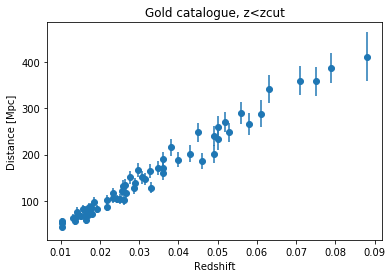

In [20]:
#@title
plt.errorbar(zlow,d[zlowindex],err_d[zlowindex],
             ls='',marker='o')
plt.xlabel('Redshift')
plt.ylabel('Distance [Mpc]')
plt.title('Gold catalogue, z<zcut')

# Let's compute our estimate of the Hubble constant

We can try to find a curve that describes the behaviour of the points in the figure above. This operation is referred to as 'fit'. This is very useful, because it allows to highlight a recurring relation between those points. This relation can be used to predict the behaviour of other objects that are still to be observed, or to extract information on the parameters that enter the relation. For example, we can try to estimate the Hubble constant!

Below, we report two fitting functions: a linear function and a quadratic function. The coefficients of both the linear and quadratic functions are free parameters. As those coefficients vary, we get a family of either straight lines or quadratic functions.

The name of the game is to vary the coefficients until we get the exact combination that minimizes the distance between the fitting function and each point in the figure (the so-called bestfit function). 

In [21]:
from scipy.optimize import curve_fit 
# scipy.optimize module contains useful functions for data analysis
# curve_fit function does the job for you. It computes the bestfit parameters
# from a data sample and given a fitting function

# The formalism below is how in python one defines functions
# def myfunction(x,a,b,c,d):
# means that we are defining a function of x with a,b,c,d free parameters
# When the function is needed, one has to call it as
# myfunction(xin,ain,bin,cin,din)
# where xin are the values in which I want the function to be evaluated
# and ain,bin,cin,din are values to be used for a,b,c,d

# First try: linear fit --> this is a linear function with angular coefficient 300000/h
# and known term b=0

def line(x, h): 
    b=0
    speed_of_light = 300000.
    return speed_of_light/h * x + b

# Second try: quadratic fit --> this is a quadratic function
 
def parabola(x, h, q): 
    c=0
    speed_of_light= 300000.
    return speed_of_light/h*(1.-q)*0.5*x**2 + speed_of_light/h*x + c


Let's start from a linear fit. Let's only consider the subsample with z<0.1 (z<zcut).

In [22]:
# curve_fit requires the following input params:
# the fitting function ('line' in this case),
# x and y coordinates of the data (zlow, d)
# and the error over y (sigma=err_d).
# The output values are:
# the bestfit parameters and their error
# In our case, we are looking for the denominator 
# of the angular coefficient of the function 'line'.
# This denominator is H0, the Hubble constant

par, cov = curve_fit(line, zlow, d[zlowindex], sigma=err_d[zlowindex])
print('H0=(',par[0],'pm',cov[0,0]**0.5, ') km/s/Mpc') 

# Note that parameters and errors are given as vector and matrix, respectively. 
# This is because
# we could have more than one parameter (and relative error).
# The off-diagonal elements in the error matrix indicates
# the possible correlation between parameters
# i.e., how much changes in one parameter affect the others

H0=( 64.21637071354274 pm 0.8062837852907799 ) km/s/Mpc


This is our estimate of the Hubble constant!
This is telling us that the Universe is expanding in such a way 
that objects at 1 Mpc from us recede away from us 
at 64.2 km/s, or 1.4 million miles/hour. Sweet!

Let's overplot the bestfit curve

Text(0.5, 1.0, 'Gold catalogue, z<0.1')

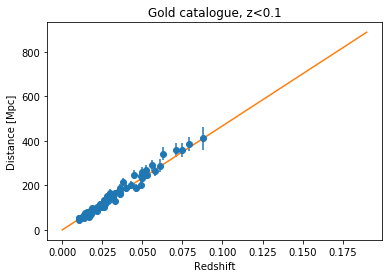

In [23]:
# This is for the data
plt.errorbar(zlow, d[zlowindex], err_d[zlowindex], ls='', marker='o') 
# This defines a dummy array for the fitting function
# The 'arange' function generates values between 0 and 0.2 separated by 0.01
zz = np.arange(0, 0.20, 0.01)  

# Let's compute the fitting function using the estimated value of H0=par[0]
speed_of_light=300000.
fit_lineare = zz*speed_of_light/par[0] 
plt.plot(zz, fit_lineare, ls='-')
plt.xlabel('Redshift')
plt.ylabel('Distance [Mpc]')
plt.title('Gold catalogue, z<0.1')

It looks like our bestfit curve nicely represents the behaviour of our data points.

Now, we'd like to know what about farther objects! This is similar to what the High-z Supernova Search Team and Supernova Cosmology Project teams did in the early '90s, and that they were later awarded the Nobel prize for!

Let's now cut our initial data catalogue at higher redshift. Let's define a new zcut, say zcut=0.6.

# Determining the deceleration parameter q0

# Fourth task:

In a similar way as we did for z<0.1, select only those objects with z<0.6.

Then, make a linear fit of this new subsample, and plot the new bestfit curve over the data.

In [24]:
# Write here your piece of code
# ...

The cell below is supposed to be hidden in google colab. It contains the solution to the exercise described above.

H0= 59.37985382579185 pm 0.920552701758712


Text(0.5, 1.0, 'Gold catalogue, z<0.6')

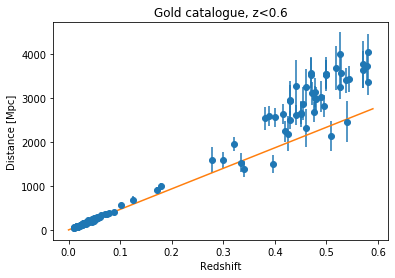

In [25]:
#@title

zcut=0.6
zlowindex=np.where(z<zcut)[0]
zlow=z[zlowindex]
popt, pcov = curve_fit(line, zlow, d[zlowindex], 
                       sigma=err_d[zlowindex])
print('H0=',popt[0],'pm',np.sqrt(pcov[0,0]))
plt.errorbar(zlow,d[zlowindex],err_d[zlowindex],
             ls='',marker='o')
zz=np.arange(zcut*100)/100.
plt.plot(zz,zz*300000/par[0],ls='-')
plt.xlabel('Redshift')
plt.ylabel('Distance [Mpc]')
plt.title('Gold catalogue, z<0.6')

What do you think about this new fit? Is it capturing the behaviour of our data points? What about those points at higher redshifts? Mmmmm...

Let's now try with a quadratic fit!

# Fifth task:

In a similar way as we did for z<0.1, select only those objects with z<0.6.

Then, make a quadratic fit of this new subsample, and plot the new bestfit curve over the data.

Remember: the 'parabola' function has two free parameters, h and q. They correspond to H0 (the Hubble constant) and q0 (the deceleration parameter).

The order of the output parameters in curve_fit replicates the order of appearance of the free parameters in the fitting function. In our case, first we have h, then q. So, if you name the output parameter vector as 'par', you have h=par[0], q=par[1].

The error on each parameter is the square root of the corresponding element along the diagonal of the error matrix. So, if you name the error matrix as cov, the error on H0 is cov[0,0]^0.5 and the error on q0 is cov[1,1]^0.5.

Now, compare this result with the previous fit.

In [26]:
# Write your piece of code here
# ...

The cell below is supposed to be hidden in google colab. It contains the solution to the exercise described above.

H0= 65.64557494802683 pm 0.9745372462797033
q0= -0.4255770193106399 pm 0.13736154012478743


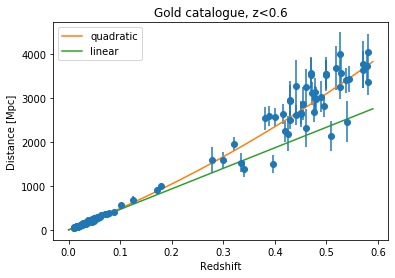

In [27]:
#@title

zcut=0.6
zlowindex=np.where(z<zcut)[0]
zlow=z[zlowindex]
par2, cov2 = curve_fit(parabola, zlow, d[zlowindex], 
                       sigma=err_d[zlowindex])
print('H0=',par2[0],'pm',np.sqrt(cov2[0,0]))
print('q0=',par2[1],'pm',np.sqrt(cov2[1,1]))
plt.errorbar(zlow,d[zlowindex],err_d[zlowindex],
             ls='',marker='o')
zz=np.arange(zcut*100)/100.
plt.plot(zz,zz*300000/par2[0]+
         zz**2*300000/par2[0]*0.5*(1-par2[1]),
         ls='-',label='quadratic')
plt.plot(zz,zz*300000/par[0],ls='-',label='linear')
plt.xlabel('Redshift')
plt.ylabel('Distance [Mpc]')
plt.title('Gold catalogue, z<0.6')
plt.legend()

Much much better! The farthest SN do not follow a linear curve. Did you notice what estimate you got for q0? How can we interpret this result? Is the Universe expanding? If so, is this expansion accelerated or delcelerated?

Now, we know that we can express q0 as a function of the content of the Universe:

q0 = Omega_m/2 - Omega_L

where Omega_m and Omega_L are proxy for the amount of matter and dark energy in the Universe.

From our estimate of q0, let's now work out the amount of matter and dark energy that we should expect to find in our Universe.

# Coffee break!

# Hunting for dark matter and dark energy

Let's refresh our memory with the use of 'for' and 'if' in python

In [28]:
vec = np.arange(7,27,1)
# Let's use 'for' to run over the elements of vec
# Let's use 'if' to select only those elements between 13 and 17

min_value = 13
max_value = 17
new_vec = list() 
# The 'list()' command creates an empty list that we can fill later

for value in vec: 
  print("The current element is ", value)  
  if(value > min_value and value < max_value):
    new_vec.append(value) 
    # The 'append' command insert the element within brackets as the last element of new_vec list
    

# Print new_vec!
print(new_vec)
             

The current element is  7
The current element is  8
The current element is  9
The current element is  10
The current element is  11
The current element is  12
The current element is  13
The current element is  14
The current element is  15
The current element is  16
The current element is  17
The current element is  18
The current element is  19
The current element is  20
The current element is  21
The current element is  22
The current element is  23
The current element is  24
The current element is  25
The current element is  26
[14, 15, 16]


# Sixth task:

Let's define

1) om = Omega_m, proxy for the amount of matter in the Universe

2) ol = Omega_L, proxy for the amount of dark energy in the Universe

Both these parameters can only take positive values.

Now, we know that q0=om/2-ol. Let's compute and then plot those pairs of om-ol values
that provide values of q0 in agreement with our estimate of q0.

In other words, if we have measured q0meas with an error of q0err, we only want to retain those values of om-ol that give q0meas-q0err < q0 < q0meas+q0err.


In [0]:
q0_meas = par2[1]
q0_err = cov2[1,1]**0.5
accepted = list()

# We want values of om and ol between 0 and 1, with step=0.01
# remember the 'arange' function we used above
# We have two parameters (om, ol), therefore, we need two 'for' cycles
# to run over all possible om-ol combinations
# Fill the missing pieces of code below

for om in ------ :  
  for ol in ------ :
    q0 = ...
    # Select with the "if" only those values of q0 between q0_meas + err and q0_meas - err
    if(------):
      accepted.append([om,ol])

The cell below is supposed to be hidden in google colab. It contains the solution to the exercise described above.

In [29]:
#@title
q0_meas = par2[1]
q0_err = cov2[1,1]**0.5
accepted = list()
for om in np.arange(0,1,step=0.01):  
  for ol in np.arange(1,0,step=-0.01):
    q0 = om/2. - ol
    if(q0>q0_meas-q0_err and q0<q0_meas+q0_err):
      accepted.append([om,ol])

# Seventh task:

Now, let's make a plot with those values!

In [31]:
# Let's make two vectors for Omega_m and Omega_L, for convenience
om_ol_vec = np.array(accepted)
om_vec = om_ol_vec[:,0]
ol_vec = om_ol_vec[:,1]

# The 'scatter' function plots pairs of coordinate
plt.scatter(om_vec, ol_vec)

# Let's invert the q0=om/2-ol relation to write ol as a function of om and q0
# Use om_vec and q0meas
# Fill the missing parts below:
ol_vec_calc = ...

# Plot the values ol_vec_calc as a function of om_vec
plt.plot(...)

# Now add one point that corresponds to the bestfit values of Omega_m and Omega_L
# as obtained by a combination of the most up-to-data cosmological data
plt.scatter(0.27,0.63)
plt.xlabel('Omega_m')
plt.ylabel('Omega_L')


"\n# Let's make two vectors for Omega_m and Omega_L, for convenience\nom_ol_vec = np.array(accepted)\nom_vec = om_ol_vec[:,0]\nol_vec = om_ol_vec[:,1]\n\n# The 'scatter' function plots pairs of coordinate\nplt.scatter(om_vec, ol_vec)\n\n# Let's invert the q0=om/2-ol relation to write ol as a function of om and q0\n# Use om_vec and q0meas\n# Fill the missing parts below:\nol_vec_calc = ...\n\n# Plot the values ol_vec_calc as a function of om_vec\nplt.plot(...)\n\n# Now add one point that corresponds to the bestfit values of Omega_m and Omega_L\n# as obtained by a combination of the most up-to-data cosmological data\nplt.scatter(0.27,0.63)\nplt.xlabel('Omega_m')\nplt.ylabel('Omega_L')\n"

The cell below is supposed to be hidden in google colab. It contains the solution to the exercise described above.

Text(0, 0.5, 'Omega_L')

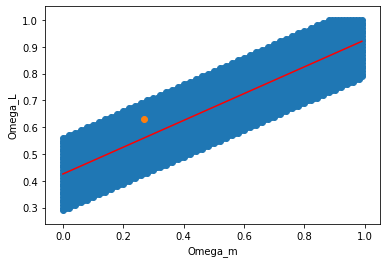

In [22]:
#@title
om_ol_vec = np.array(accepted)
om_vec = om_ol_vec[:,0]
ol_vec = om_ol_vec[:,1]

plt.scatter(om_vec, ol_vec)
ol_vec_calc = om_vec/2.-q0_meas
plt.plot(om_vec, ol_vec_calc, '-r')
plt.scatter(0.27,0.63)
plt.xlabel('Omega_m')
plt.ylabel('Omega_L')

Fantastic! You just plot the region in the Omega_m-Omega_L plane that is in agreement with estimated value of q0!
This means that all those points in the band are likely descriptions of our Universe, according to the SN data we used.

Note that Omega_L=0 is excluded from this region. This means that a Universe with no dark energy is not a good description of our Universe, according to SN data!

The orange dot corresponds to values of Omega_m and Omega_L as contrained by the combination of several cosmological probes, such as measurements of the cosmic microwave background anisotropies or measurements of the distribution of matter in the Universe. As you can see, the orange dot is contained within the region preferred by SN data! This means that several, independent, cosmological measurements agree on the fact that our Universe today is mostly made by dark energy.

And this is a new story...although the dark energy makes 70% of the energy budget in the Universe, we still do not know what the dark energy is. Scientists say that the dark energy paradigm provides a good phenomenological description of the Universe, however it fails from the fundamental physics point of view. It fails because we still don't have a satisfying description of the fundamental properties of dark energy: what it is, where it comes from, is its density constant with time, or is it evolving with time? This is one of the most exciting and active field of research in cosmology today!